In [ ]:
data_path = 'content/hribm.csv'

# Data understanding

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix
#import matplotlib.transforms as mtransforms

In [ ]:
df_dataset = pd.read_csv(data_path)


np.random.seed(42)

In [ ]:
dataDescribe = df_dataset.describe(include='all')
print(dataDescribe)

                Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
count   1470.000000      1470  ...             1470.000000           1470.000000
unique          NaN         2  ...                     NaN                   NaN
top             NaN        No  ...                     NaN                   NaN
freq            NaN      1233  ...                     NaN                   NaN
mean      36.923810       NaN  ...                2.187755              4.123129
std        9.135373       NaN  ...                3.222430              3.568136
min       18.000000       NaN  ...                0.000000              0.000000
25%       30.000000       NaN  ...                0.000000              2.000000
50%       36.000000       NaN  ...                1.000000              3.000000
75%       43.000000       NaN  ...                3.000000              7.000000
max       60.000000       NaN  ...               15.000000             17.000000

[11 rows x 35 columns]


Graphs

*MonthlyIncome*

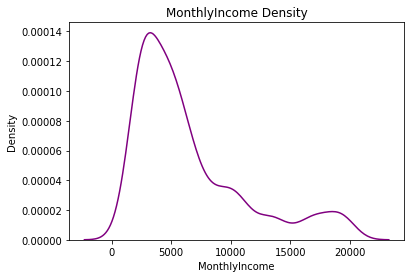

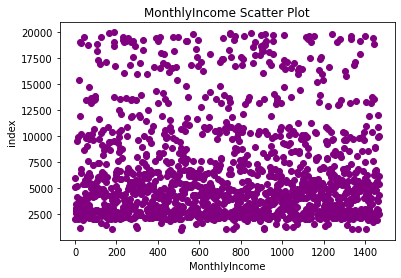

In [ ]:
sns.distplot(df_dataset['MonthlyIncome'],  hist=False, kde=True, color='purple',norm_hist=True).set(title='MonthlyIncome Density')
plt.show()
#scatter
plt.scatter(x=df_dataset.index, y=df_dataset['MonthlyIncome'], c=['purple'])
plt.xlabel('MonthlyIncome')
plt.ylabel('index')
plt.title('MonthlyIncome Scatter Plot')
plt.show()

*MonthlyIncome by JobLevel*

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

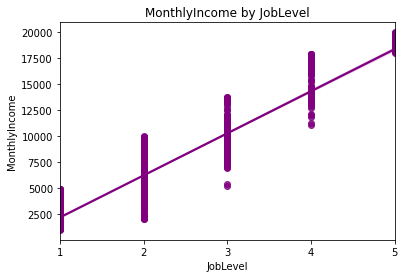

In [ ]:
fig, ax = plt.subplots()
sns.regplot(x='JobLevel',
                 y="MonthlyIncome",
                 data=df_dataset,
                 color='purple').set(title='MonthlyIncome by JobLevel')
ax.set(xticks=np.arange(1, 6, 1))
ax.set_xticklabels(['1', '2', '3','4','5'])

*MonthlyIncome by Education*

[Text(0, 0, 'Below College'),
 Text(0, 0, 'College'),
 Text(0, 0, 'Bachelor'),
 Text(0, 0, 'Master'),
 Text(0, 0, 'Doctor')]

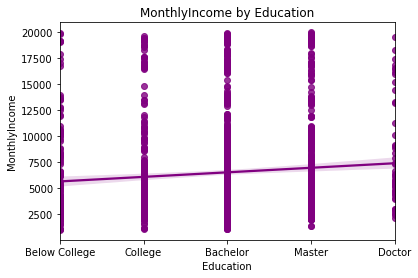

In [ ]:
fig, ax = plt.subplots()
sns.regplot(x='Education',
                 y="MonthlyIncome",
                 data=df_dataset,
                 color='purple').set(title='MonthlyIncome by Education')
ax.set(xticks=np.arange(1, 6, 1))
ax.set_xticklabels(['Below College', 'College', 'Bachelor','Master','Doctor'])
#plt.grid(b=None)

*MonthlyIncome by Age*

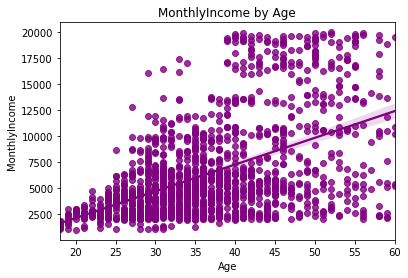

In [ ]:
sns.regplot(x='Age', y="MonthlyIncome", data=df_dataset, color='purple').set(title='MonthlyIncome by Age');

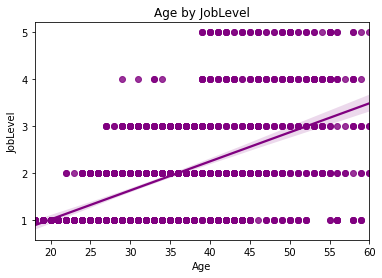

In [ ]:
sns.regplot(x='Age', y="JobLevel", data=df_dataset, color='purple').set(title='Age by JobLevel');

*PercentSalaryHike by PerformanceRating*

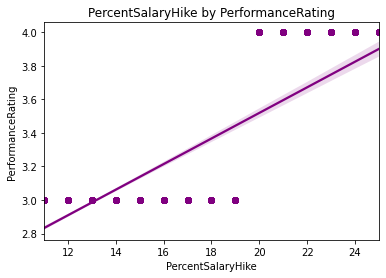

In [ ]:
sns.regplot(x='PercentSalaryHike', y="PerformanceRating", data=df_dataset, color='purple').set(title='PercentSalaryHike by PerformanceRating');

making label df

In [ ]:
labels =df_dataset['MonthlyIncome']
labels2 = labels
######
df_dataset.drop(['MonthlyIncome'], axis=1, inplace=True)
#df_dataset.describe


In [ ]:
#labels
labelsDescribe = labels.describe(include='all')


JobLevel

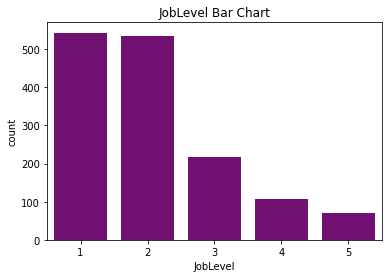

In [ ]:
# # ---------------------------- JobLevel  -----------------------------
uni = pd.value_counts(df_dataset['JobLevel'])
# print(uni)
# plot bar chart
p1 = sns.countplot(x=df_dataset['JobLevel'], color='purple')
p1.set(title='JobLevel Bar Chart')
plt.show()

DistanceFromHome

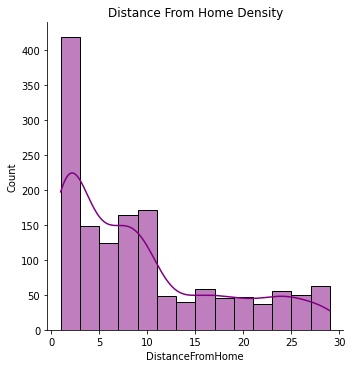

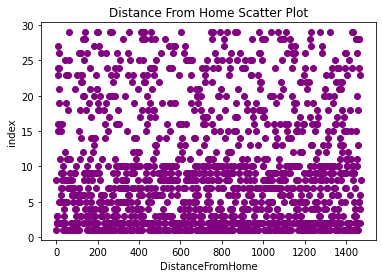

In [ ]:
# histogram
sns.displot(data=df_dataset, x="DistanceFromHome", kde=True, color='purple').set(title='Distance From Home Density')
plt.show()
# scatter plot
plt.scatter(x=df_dataset.index, y=df_dataset['DistanceFromHome'], c=['purple'])
plt.xlabel('DistanceFromHome')
plt.ylabel('index')
plt.title('Distance From Home Scatter Plot')
plt.show()

Age

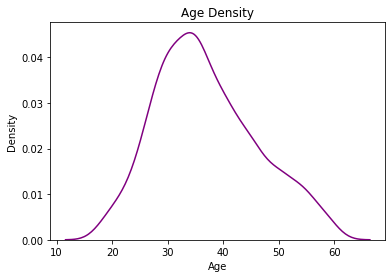

In [ ]:
sns.distplot(df_dataset['Age'],  hist=False, kde=True, color='purple',norm_hist=True).set(title='Age Density')
plt.show()

EducationField

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


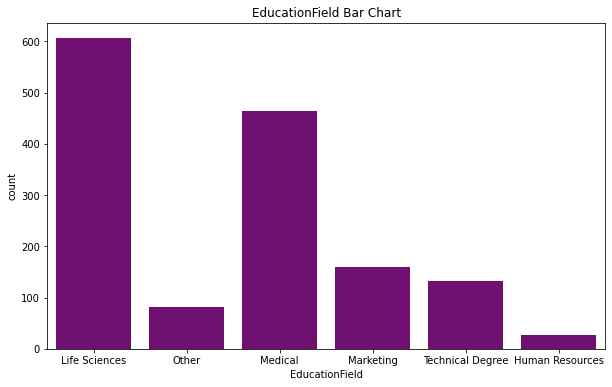

In [ ]:
uni = pd.value_counts(df_dataset['EducationField'])
print(uni)
plt.figure(figsize=(10,6))
# plot bar chart
p1 = sns.countplot(x=df_dataset['EducationField'], color='purple')
p1.set(title='EducationField Bar Chart')
plt.show()

Education

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


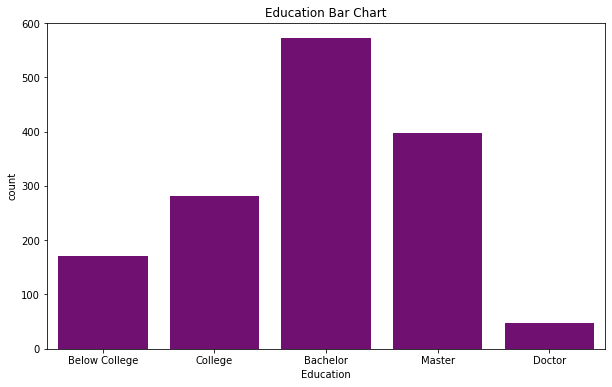

In [ ]:
uni = pd.value_counts(df_dataset['Education'])
print(uni)
plt.figure(figsize=(10,6))
# plot bar chart
p1 = sns.countplot(x=df_dataset['Education'], color='purple')
p1.set(title='Education Bar Chart')
p1.set_xticklabels(['Below College', 'College', 'Bachelor','Master','Doctor'])
plt.show()

Gender

Male      882
Female    588
Name: Gender, dtype: int64

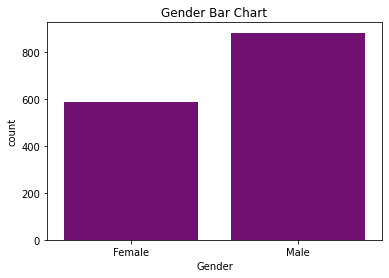

In [ ]:
sns.countplot(x=df_dataset['Gender'], color='purple').set(title='Gender Bar Chart')
pd.value_counts(df_dataset['Gender'])

Job Satisfaction

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

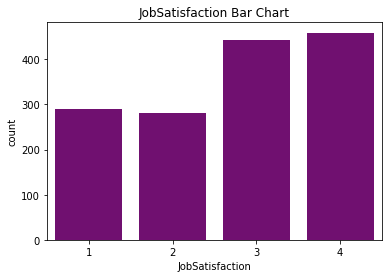

In [ ]:
sns.countplot(x=df_dataset['JobSatisfaction'], color='purple').set(title='JobSatisfaction Bar Chart')
pd.value_counts(df_dataset['JobSatisfaction'])

TotalWorkingYears

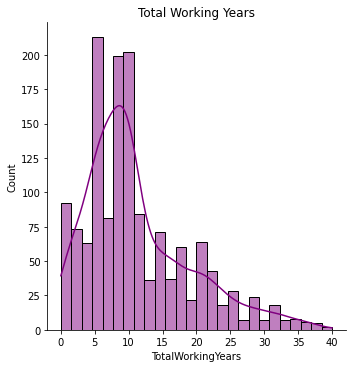

In [ ]:
sns.displot(data=df_dataset, x="TotalWorkingYears", kde=True, color='purple').set(title='Total Working Years')

Attrition

No     1233
Yes     237
Name: Attrition, dtype: int64

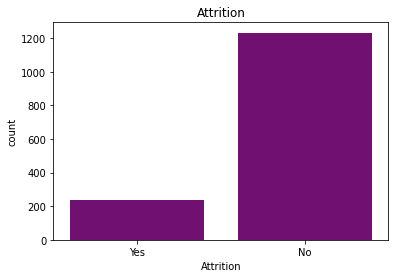

In [ ]:
sns.countplot(x=df_dataset['Attrition'], color='purple').set(title='Attrition')
pd.value_counts(df_dataset['Attrition'])

##### Check for Outliers

In [ ]:
# boxplot
df_num = df_dataset.select_dtypes(exclude='object')
for i in range(len(df_num.columns)):
    sns.boxplot(df_num.iloc[:,i])
    plt.grid(b=None)
    plt.show()

# skewness
df_num.skew().sort_values(ascending = False)
df_dataset['YearsSinceLastPromotion'] = np.sqrt(df_dataset['YearsSinceLastPromotion'])
df_dataset['PerformanceRating'] = np.sqrt(df_dataset['PerformanceRating'])
df_dataset['YearsAtCompany'] = np.sqrt(df_dataset['YearsAtCompany'])

del df_num, i

NameError: ignored

cleaning the data

In [ ]:
# check the same with pandas if there is duplication
rowsNum = len(df_dataset)
print('At the beginning df len if ', rowsNum)
df_dataset.drop_duplicates()
rowsNumNew = len(df_dataset)
print('After drop df len if ', rowsNumNew)
equal = 'Yes' if rowsNum == rowsNumNew else 'No'
print('Do the files equal? ' + equal)

# Check unique values - top 3 columns to remove
df_dataset.nunique().sort_values(ascending = True)

# Department-JobRole - unifing columns
indexes = np.where(df_dataset['JobRole'] == 'Manager')
df_dataset['JobRole'].loc[indexes] = 'Manager of ' + df_dataset['Department'].loc[indexes]

del indexes

At the beginning df len if  1470
After drop df len if  1470
Do the files equal? Yes


In [ ]:
df_dataset.loc[df_dataset['YearsAtCompany'] >= 2, 'old_worker_indocator'] = 1
df_dataset.loc[df_dataset['YearsAtCompany'] < 2, 'old_worker_indocator'] = 0

In [ ]:
# ------------------------------ delete ----------------------------------------
del df_dataset['Over18']
del df_dataset['StandardHours']
del df_dataset['EmployeeCount']
del df_dataset['PerformanceRating']   #we cant know the PerformanceRating before he started
del df_dataset['EmployeeNumber']
del df_dataset['DailyRate']
del df_dataset['HourlyRate']
del df_dataset['MonthlyRate']


In [ ]:
# #see that the columns are gone
# dataDescribe = df_dataset.describe(include='all')
# print(dataDescribe)

convert to numeric no order

In [ ]:
# ---------------------------convert to numeric no order----------------------------------------
df_dataset['Attrition'] = pd.factorize(df_dataset.Attrition)[0]
df_dataset['EducationField'] = pd.factorize(df_dataset.EducationField)[0]
df_dataset['Gender'] = pd.factorize(df_dataset.Gender)[0]
df_dataset['JobRole'] = pd.factorize(df_dataset.JobRole)[0]
df_dataset['MaritalStatus'] = pd.factorize(df_dataset.MaritalStatus)[0]
df_dataset['OverTime'] = pd.factorize(df_dataset.OverTime)[0]

drop 'Department'

In [ ]:
# Department ~ JobRole - Because a position indicates the department we can connect them and drop the department
indexes = np.where(df_dataset['JobRole'] == 'Manager')
df_dataset['JobRole'].loc[indexes] = 'Manager of ' + df_dataset['Department'].loc[indexes]
del df_dataset['Department']

convert to numeric with order

In [ ]:
# ---------------------------convert to numeric with order----------------------------------------
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# DistanceFromHome  0-30
df_dataset['catDistanceFromHome'] = pd.cut(df_dataset.DistanceFromHome,bins=[-1,10,15,20,25,30],labels=[1,2,3,4,5])
del df_dataset['DistanceFromHome']

# TotalWorkingYears 0-40
df_dataset['catTotalWorkingYears'] = pd.cut(df_dataset.TotalWorkingYears,bins=[-1,10,15,20,25,50],labels=[1,2,3,4,5])
del df_dataset['TotalWorkingYears']

# YearsAtCompany  0-40
df_dataset['catYearsAtCompany'] = pd.cut(df_dataset.YearsAtCompany,bins=[-1,10,15,20,25,50],labels=[1,2,3,4,5])
del df_dataset['YearsAtCompany']

# YearsInCurrentRole  0-18
df_dataset['catYearsInCurrentRole'] = pd.cut(df_dataset.YearsInCurrentRole,bins=[-1,10,20,30],labels=[1,2,3])
del df_dataset['YearsInCurrentRole']

# YearsWithCurrManager  0-17
df_dataset['catYearsWithCurrManager'] = pd.cut(df_dataset.YearsWithCurrManager,bins=[-1,6,10,30],labels=[1,2,3])
del df_dataset['YearsWithCurrManager']

# YearsSinceLastPromotion  0-15
df_dataset['catYearsSinceLastPromotion'] = pd.cut(df_dataset.YearsSinceLastPromotion,bins=[-1,5,10,15,20,30],labels=[1,2,3,4,5])
del df_dataset['YearsSinceLastPromotion']

# BusinessTravel  'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'
a = pd.Categorical( df_dataset['BusinessTravel'], categories =['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'])
df_dataset['BusinessTravel'] = pd.factorize(a)[0]

Normalization

In [ ]:
temp = df_dataset.columns

df_dataset = preprocessing.MinMaxScaler().fit_transform(df_dataset)
df_dataset = pd.DataFrame(df_dataset, columns=temp)

del(temp)

new features

In [ ]:
df_dataset['worker'] =0.2 * df_dataset['JobInvolvement'] +0.2 * df_dataset['PercentSalaryHike'] +0.2 * df_dataset['TrainingTimesLastYear']  +0.4 * df_dataset['catYearsSinceLastPromotion']

In [ ]:
df_dataset['Satisfaction'] =  0.3 * df_dataset['JobSatisfaction'] + 0.2 * df_dataset['EnvironmentSatisfaction'] + 0.3 * df_dataset['catYearsWithCurrManager']+ 0.1 * df_dataset['catYearsSinceLastPromotion']+ 0.1 * df_dataset['RelationshipSatisfaction']

In [ ]:
df_dataset['worker'] =  df_dataset['worker']  * df_dataset['old_worker_indocator']
df_dataset['Satisfaction'] =  df_dataset['Satisfaction']  * df_dataset['old_worker_indocator']

heat map

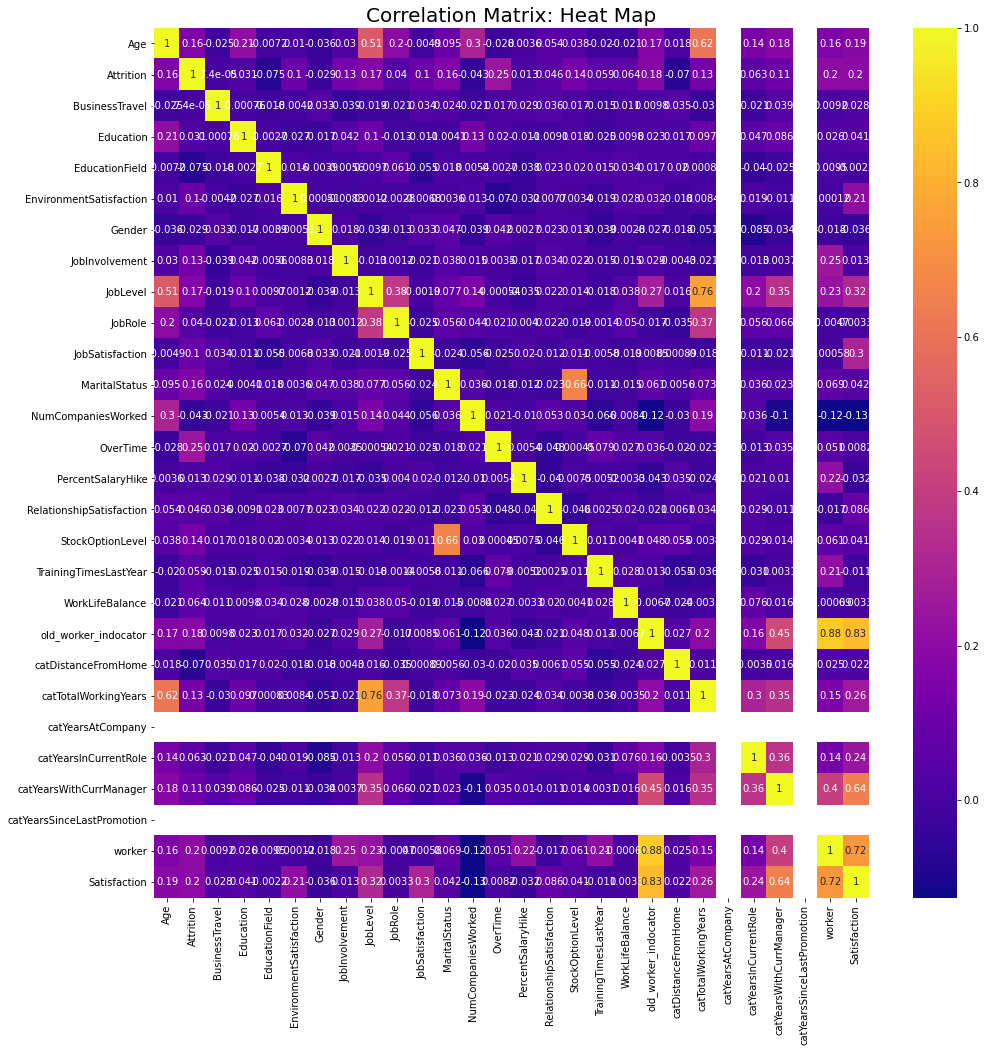

In [ ]:
# Correlation Map
plt.subplots(figsize=(16,16))
sns.heatmap(df_dataset.corr(), annot=True, cmap='plasma')
plt.title("Correlation Matrix: Heat Map", fontsize=20)
plt.show()

Calculation of high correlations larger than 0.4 ans smaller than -0.4

In [ ]:
def all_correlation(correlation_df):
    result_names = []
    result = []

    for i in correlation_df.columns:
        # target variable
        if i == 'MonthlyIncome':
            continue
        for j in correlation_df.index:
            # featue with itself
            if i == j:
                continue
            # low correlation
            elif correlation_df.at[i, j] <= 0.4 and correlation_df.at[i, j] >= -0.4:
                continue
            # filter uniques
            elif (j, i) in result_names:
                continue
            # target variable
            elif j == 'MonthlyIncome':
                continue
            else:
                result_names.append((i, j))
                result.append(correlation_df.at[i, j])


    return pd.DataFrame(list(zip(result_names, result)),
                        columns =['Pair', 'Corr']).sort_values('Corr', ascending = False)


all_correlation(df_dataset.corr()).head(20)

,Pair,Corr
45,"(old_worker_indocator, worker)",0.878802
46,"(old_worker_indocator, Satisfaction)",0.834832
18,"(JobLevel, catTotalWorkingYears)",0.755081
62,"(worker, Satisfaction)",0.724570
25,"(MaritalStatus, StockOptionLevel)",0.662577
59,"(catYearsWithCurrManager, Satisfaction)",0.644746
1,"(Age, catTotalWorkingYears)",0.616547
0,"(Age, JobLevel)",0.509604
43,"(old_worker_indocator, catYearsWithCurrManager)",0.451130
58,"(catYearsWithCurrManager, worker)",0.403307


Deleting features

In [ ]:
del df_dataset['old_worker_indocator']
del df_dataset['Satisfaction']
####
del df_dataset['Age']
del df_dataset['MaritalStatus']
del df_dataset['catYearsAtCompany']
del df_dataset['catTotalWorkingYears']
######
del df_dataset['JobSatisfaction']
del df_dataset['EnvironmentSatisfaction']
del df_dataset['JobInvolvement']
del df_dataset['RelationshipSatisfaction']
del df_dataset['TrainingTimesLastYear']
del df_dataset['catYearsSinceLastPromotion']
del df_dataset['catYearsWithCurrManager']
del df_dataset['catYearsInCurrentRole']
####


In [ ]:
dataDescribe = df_dataset.describe(include='all')
print(dataDescribe)

         Attrition  BusinessTravel  ...  catDistanceFromHome       worker
count  1470.000000     1470.000000  ...          1470.000000  1470.000000
mean      0.838776        0.196259  ...             0.180952     0.182698
std       0.367863        0.332727  ...             0.312129     0.142574
min       0.000000        0.000000  ...             0.000000     0.000000
25%       1.000000        0.000000  ...             0.000000     0.000000
50%       1.000000        0.000000  ...             0.000000     0.214286
75%       1.000000        0.500000  ...             0.250000     0.290476
max       1.000000        1.000000  ...             1.000000     0.533333

[8 rows x 14 columns]


In [ ]:
print(df_dataset.columns)
df_dataset_imp = df_dataset

Index(['Attrition', 'BusinessTravel', 'Education', 'EducationField', 'Gender',
       'JobLevel', 'JobRole', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'StockOptionLevel', 'WorkLifeBalance',
       'catDistanceFromHome', 'worker'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# k-means

100%|██████████| 8/8 [00:01<00:00,  4.95it/s]


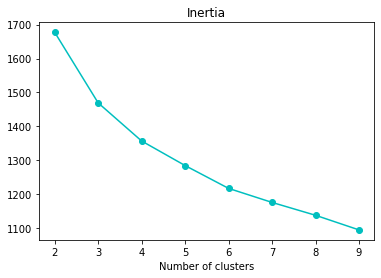

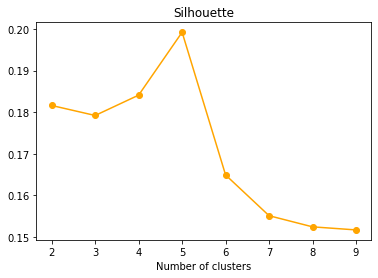

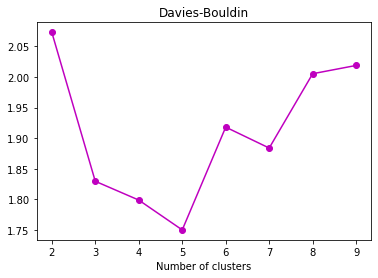

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

iner_list = []
dbi_list = []
sil_list = []

datasetKmeans = df_dataset
#kmeans = KMeans(n_clusters=5, max_iter=300, n_init=10, random_state=42)
from tqdm import tqdm
for n_clusters in tqdm(range(2, 10, 1)):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, n_init=10, random_state=42)
    kmeans.fit(datasetKmeans)
    assignment = kmeans.predict(datasetKmeans)

    iner = kmeans.inertia_
    sil = silhouette_score(datasetKmeans, assignment)
    dbi = davies_bouldin_score(datasetKmeans, assignment)

    dbi_list.append(dbi)
    sil_list.append(sil)
    iner_list.append(iner)

plt.plot(range(2, 10, 1), iner_list, marker='o', color='c')
plt.title("Inertia")
plt.xlabel("Number of clusters")
#plt.grid(b=None)
plt.show()

plt.plot(range(2, 10, 1), sil_list, marker='o',color='orange')
plt.title("Silhouette")
plt.xlabel("Number of clusters")
#plt.grid(b=None)
plt.show()

plt.plot(range(2, 10, 1), dbi_list, marker='o',color='m')
plt.title("Davies-Bouldin")
plt.xlabel("Number of clusters")
#plt.grid(b=None)
plt.show()


*Split - train-test*




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_dataset, labels, test_size=0.2, random_state = 0)

#**Linear Regression**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

%time reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))

print('cof', reg.coef_)

reg.intercept_

y_hat_REG = reg.predict(X_test)


print('Basic LinearRegression')
print('explained_variance_score:', explained_variance_score(y_test, y_hat_REG))
print('RMSE:', mean_squared_error(y_test, y_hat_REG, squared=False))
print('R2:', r2_score(y_test, y_hat_REG))


CPU times: user 6.55 ms, sys: 4.93 ms, total: 11.5 ms
Wall time: 11.6 ms
0.9119985596214567
cof [  100.00821783  -234.98453164   161.58835836   -23.90283096
    43.62033188 15415.4254463   1911.24628407   205.73058254
   -87.95788364    63.44624088   -87.37901245  -332.43525771
  -157.04613771   195.88256871]
Basic LinearRegression
explained_variance_score: 0.9213385448127992
RMSE: 1300.7712775333073
R2: 0.9212617941067333


# assumptions associated with a linear regression model

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     859.4
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:04:22   Log-Likelihood:                -10189.
No. Observations:                1176   AIC:                         2.041e+04
Df Residuals:                    1161   BIC:                         2.048e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1930.7079    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)
results = model.fit()
results.params

const                   1930.707863
Attrition                100.008218
BusinessTravel          -234.984532
Education                161.588358
EducationField           -23.902831
Gender                    43.620332
JobLevel               15415.425446
JobRole                 1911.246284
NumCompaniesWorked       205.730583
OverTime                 -87.957884
PercentSalaryHike         63.446241
StockOptionLevel         -87.379012
WorkLifeBalance         -332.435258
catDistanceFromHome     -157.046138
worker                   195.882569
dtype: float64

In [ ]:
X = X_test
y = y_test

X = sm.add_constant(X)
y_pred_lin = results.predict(X)
residual = y_test - y_pred_lin


**No Multicolinearity**

In [ ]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Attrition,BusinessTravel,Education,EducationField,Gender,JobLevel,JobRole,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,WorkLifeBalance,catDistanceFromHome,worker
vif,6.450922,1.349725,4.207603,1.972718,2.384182,2.683188,2.41426,2.220247,3.708411,2.363454,1.90348,5.710129,1.331885,3.191464


** **bold text**Normailty of Residual**

40.61153182619746


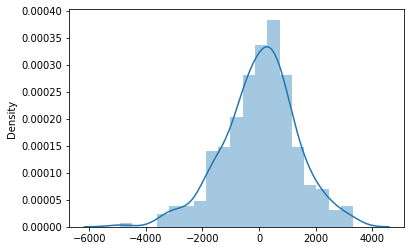

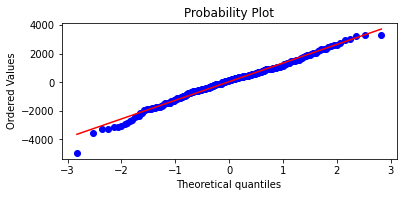

In [ ]:
sns.distplot(residual)

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)


print(np.mean(residual))

**Homoscedasticity**

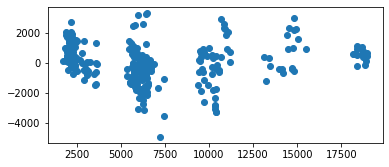

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred_lin, residual)

**No autocorrelation of residuals**

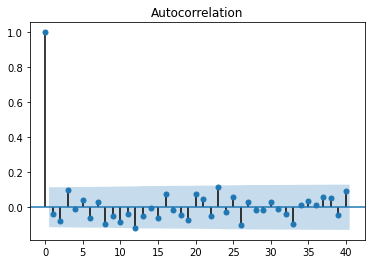

In [ ]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

# **Ridge**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(0, 9):
    ridgeModel = linear_model.Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = ((scores)*100).mean()
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
print('Ridge - avg cross val score for different alpha')
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

Ridge - avg cross val score for different alpha
0.0 : 91.14537429365983
0.25 : 91.14989095900448
0.5 : 91.12332367771637
0.75 : 91.06886967185451
1.0 : 90.98931573621773
1.25 : 90.88711058948756
1.5 : 90.7644204063507
1.75 : 90.62317230723451
2.0 : 90.46508902824516


In [ ]:

# Building and fitting the Ridge Regression Model
RidgeoModelChosen = linear_model.Ridge(alpha = 0.25)
RidgeoModelChosen.fit(X_train, y_train)

# Evaluating the Ridge Regression model
print(RidgeoModelChosen.score(X_test, y_test))
predictionsRidge = RidgeoModelChosen.predict(X_test)

print('Ridge')
print('explained_variance_score:', explained_variance_score(y_test, predictionsRidge))
print('RMSE:', mean_squared_error(y_test, predictionsRidge, squared=False))
print('R2:', r2_score(y_test, predictionsRidge))
print('MAE:', mean_absolute_error(y_test, predictionsRidge))

0.9212605709280213
Ridge
explained_variance_score: 0.9213399393058016
RMSE: 1300.7813810754096
R2: 0.9212605709280213
MAE: 1003.2410492505708


# **Lasso**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
# List to maintain the cross-validation scores
cross_val_scores_lasso = []

# List to maintain the different values of Lambda
Lambda = []

# Loop to compute the cross-validation scores
for i in range(0, 9):
    lassoModel = linear_model.Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = ((scores)*100).mean()
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)

# Loop to print the different values of cross-validation scores
print('Lasso - avg cross val score for different lambda ')
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

Lasso - avg cross val score for different lambda 
0.0 : 91.13302999599176
0.25 : 91.1406771286769
0.5 : 91.14780068481284
0.75 : 91.15466554930492
1.0 : 91.16139077724998
1.25 : 91.16797740818393
1.5 : 91.17432099044606
1.75 : 91.18050748093313
2.0 : 91.18654224047063


In [ ]:

# Building and fitting the Lasso Regression Model
lassoModelChosen = linear_model.Lasso(alpha = 2.0, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)

# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))
predictionsLasso = lassoModelChosen.predict(X_test)

print('Lasso')
print('explained_variance_score:', explained_variance_score(y_test, predictionsLasso))
print('RMSE:', mean_squared_error(y_test, predictionsLasso, squared=False))
print('R2:', r2_score(y_test, predictionsLasso))
print('MAE:', mean_absolute_error(y_test, predictionsLasso))

0.9215383427040978
Lasso
explained_variance_score: 0.9216189973789598
RMSE: 1298.4849485089671
R2: 0.9215383427040978
MAE: 999.7991435310574


In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
%time reg.fit(X_train, y_train)

predictionsLasso = reg.predict(X_test)

print('Basic Lasso')
print('explained_variance_score:', explained_variance_score(y_test, predictionsLasso))
print('RMSE:', mean_squared_error(y_test, predictionsLasso, squared=False))
print('R2:', r2_score(y_test, predictionsLasso))
print('MAE:', mean_absolute_error(y_test, predictionsLasso))

CPU times: user 5.09 ms, sys: 4.2 ms, total: 9.29 ms
Wall time: 7.76 ms
Basic Lasso
explained_variance_score: 0.9213534684822289
RMSE: 1300.6504629896854
R2: 0.9212764197043432
MAE: 1002.716894240777


# **Random Forest BASIC**

In [ ]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
%time clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#
print('Basic RandomForestRegressor')
print('explained_variance_score:', explained_variance_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

CPU times: user 565 ms, sys: 60 ms, total: 625 ms
Wall time: 565 ms
Basic RandomForestRegressor
explained_variance_score: 0.9448155977594788
RMSE: 1089.4799540754113
R2: 0.9447640121737784
MAE: 840.2741405895691


# **Random Forest + CV**

In [ ]:
grid_searchRF = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
                           param_grid={
                                       'bootstrap': [True],
                                        'max_depth': [50,70,90],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300]
                                        },
                           refit=True,
                           cv=10)
%time grid_searchRF.fit(X_train, y_train)
cv_best_RF = grid_searchRF.best_estimator_
print(grid_searchRF.best_params_)
cv_FR_results = cross_validate(cv_best_RF, X_train, y_train, cv=10, return_train_score=True)
print('cv_FR_results',cv_FR_results)
y_pred_RF=cv_best_RF.predict(X_test)
#List of features for later use
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(cv_best_RF.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# print(df_dataset.columns)

print('Improved RandomForestRegressor')
print('explained_variance_score:', explained_variance_score(y_test, y_pred_RF))
print('RMSE:', mean_squared_error(y_test, y_pred_RF, squared=False))
print('R2:', r2_score(y_test, y_pred_RF))
print('MAE:', mean_absolute_error(y_test, y_pred_RF))

CPU times: user 5min 20s, sys: 938 ms, total: 5min 21s
Wall time: 5min 20s
{'bootstrap': True, 'max_depth': 50, 'min_samples_split': 50, 'n_estimators': 100}
cv_FR_results {'fit_time': array([0.25588059, 0.23941612, 0.2486279 , 0.23642492, 0.23754883,
       0.23923373, 0.23919845, 0.23932195, 0.24082971, 0.23689079]), 'score_time': array([0.00846863, 0.00824809, 0.0105896 , 0.00806928, 0.00807762,
       0.00845313, 0.00818777, 0.00825644, 0.00823498, 0.00873446]), 'test_score': array([0.93445538, 0.94592151, 0.93587087, 0.94930016, 0.92511012,
       0.94325331, 0.94492563, 0.96774477, 0.92627055, 0.93896287]), 'train_score': array([0.95380399, 0.95311385, 0.95439999, 0.9530277 , 0.95443496,
       0.95356089, 0.95358497, 0.95003084, 0.95510873, 0.95350583])}
Variable: JobLevel             Importance: 0.9598525366
Variable: JobRole              Importance: 0.0306646779
Variable: worker               Importance: 0.0020216079
Variable: NumCompaniesWorked   Importance: 0.0017761918
Vari

# **MLP BASIC**

In [ ]:
from sklearn.neural_network import MLPRegressor

%time regr = MLPRegressor().fit(X_train, y_train)
y_pred = regr.predict(X_test)
#print(regr.score(X_test, y_test))
#
print('Basic MLPRegressor')
print('explained_variance_score:', explained_variance_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

CPU times: user 1.47 s, sys: 1.14 s, total: 2.61 s
Wall time: 1.36 s
Basic MLPRegressor
explained_variance_score: 0.03984091980751514
RMSE: 6997.110251635585
R2: -1.2783533073787874
MAE: 5322.282025650756


# **MLP + CV**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

mlp_param_grid = {
            'activation': ['identity', 'logistic' 'relu', 'tanh'],
            'solver' :   [ 'lbfgs' ] ,
            'learning_rate' : ['constant', 'invscaling', 'adaptive'],
            'learning_rate_init': np.arange(0.0001,0.1),
            'alpha' :  np.arange(0.0,0.0001,0.00001),
            'hidden_layer_sizes': [(14, ), (28, )]
                  }

mlp_grid_search = GridSearchCV(estimator=MLPRegressor(max_iter=200),
                           param_grid=mlp_param_grid,
                           refit=True,
                           cv=10)

%time mlp_grid_search.fit(X_train, y_train)
best_mlp_estimator = mlp_grid_search.best_estimator_; best_mlp_estimator
%time best_mlp_estimator.fit(X_train, y_train)
best_mlp_estimator.get_params(deep=True)
y_pred_MLP = best_mlp_estimator.predict(X_test)
#
print(best_mlp_estimator)
#
print('Improved MLPRegressor')
print('explained_variance_score:', explained_variance_score(y_test, y_pred_MLP))
print('RMSE:', mean_squared_error(y_test, y_pred_MLP, squared=False))
print('R2:', r2_score(y_test, y_pred_MLP))
print('MAE:', mean_absolute_error(y_test, y_pred_MLP))



CPU times: user 1min 24s, sys: 1min, total: 2min 24s
Wall time: 1min 13s
CPU times: user 65.9 ms, sys: 46.7 ms, total: 113 ms
Wall time: 56.4 ms
MLPRegressor(activation='identity', alpha=7.000000000000001e-05,
             batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
             epsilon=1e-08, hidden_layer_sizes=(28,), learning_rate='adaptive',
             learning_rate_init=0.0001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
Improved MLPRegressor
explained_variance_score: 0.9213395648672207
RMSE: 1300.763668623166
R2: 0.9212627152681878
MAE: 1002.8408629297458


In [ ]:
print('Improved MLPRegressor')
print('explained_variance_score:', explained_variance_score(y_test, y_pred_MLP))
print('RMSE:', mean_squared_error(y_test, y_pred_MLP, squared=False))
print('R2:', r2_score(y_test, y_pred_MLP))
print('MAE:', mean_absolute_error(y_test, y_pred_MLP))


Improved MLPRegressor
explained_variance_score: 0.9213395648672207
RMSE: 1300.763668623166
R2: 0.9212627152681878
MAE: 1002.8408629297458


In [ ]:
print(best_mlp_estimator)

MLPRegressor(activation='identity', alpha=7.000000000000001e-05,
             batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
             epsilon=1e-08, hidden_layer_sizes=(28,), learning_rate='adaptive',
             learning_rate_init=0.0001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


# **XGBOOST BASIC**

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
# define model
model = XGBRegressor()
# fit model
arr1 = X_train.to_numpy()
arr2 = y_train.to_numpy()
arr3 = X_test.to_numpy()
%time model.fit(arr1 , arr2)
# make a prediction
yhat = model.predict(arr3)
# summarize prediction
print(model.get_params)

print('Basic XGBRegressor')
print('explained_variance_score:', explained_variance_score(y_test, yhat))
print('RMSE:', mean_squared_error(y_test, yhat, squared=False ))
print('R2:', r2_score(y_test, yhat))
print('MAE:', mean_absolute_error(y_test, yhat))

[18:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 81.7 ms, sys: 13.3 ms, total: 95 ms
Wall time: 83.2 ms
<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>
Basic XGBRegressor
explained_variance_score: 0.9483930879851467
RMSE: 1055.449732761462
R2: 0.9481607456481194
MAE: 822.7999342315051


# **XGBOOST  + CV**

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
X_trainaa = X_train.to_numpy()
X_trainbb = X_test.to_numpy()
arr1 = xgb.DMatrix(X_trainaa, label = y_train)
arr2 = xgb.DMatrix(X_trainbb, label = y_test)
print(X_trainaa)
estimator = xgb.XGBRegressor()
parameters = {'max_depth':[3,6,9]  ,
              'min_child_weight': [1,2],
              'eta':[0.3,0.5],
              'subsample': [1,2],
              'colsample_bytree': [1,2]
}



grid_search_XG = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'r2',
    n_jobs = 2,
    cv = 10,
    verbose=True
    )

arr3 = X_test.to_numpy()
%time grid_search_XG.fit(X_trainaa,y_train)
print(grid_search_XG.best_estimator_)
preds_XG = grid_search_XG.predict(arr3)
# print('Predicted: %.3f' , preds_XG)
# MSE = mean_squared_error(y_test , preds_XG)
# print('XGBoost validation MSE = ',MSE)
print(grid_search_XG)

#
print('Improved XGBRegressor')
print('explained_variance_score:', explained_variance_score(y_test, preds_XG))
print('RMSE:', mean_squared_error(y_test, preds_XG, squared=False ))
print('R2:', r2_score(y_test, preds_XG))
print('MAE:', mean_absolute_error(y_test, preds_XG))

[[1.         0.         0.5        ... 0.33333333 0.75       0.        ]
 [1.         0.         0.5        ... 0.66666667 1.         0.36190476]
 [1.         0.         0.5        ... 0.33333333 1.         0.27619048]
 ...
 [1.         0.         0.5        ... 0.66666667 0.         0.31904762]
 [1.         0.         1.         ... 0.         0.         0.        ]
 [1.         0.         0.75       ... 0.33333333 0.         0.        ]]
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 100 tasks      | elapsed:    7.1s


[18:11:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1.22 s, sys: 67.9 ms, total: 1.29 s
Wall time: 17.1 s
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=2, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', lea

[Parallel(n_jobs=2)]: Done 480 out of 480 | elapsed:   17.0s finished


# compare the models prediction

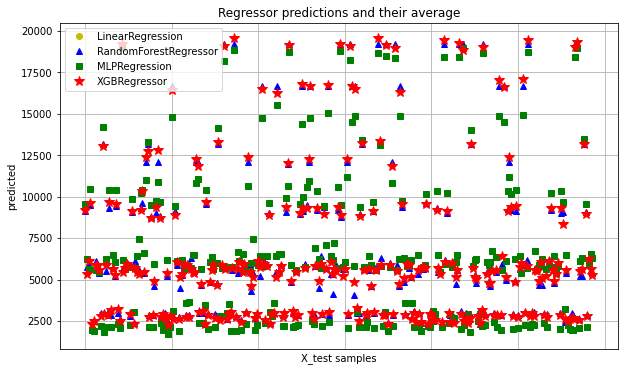

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_hat_REG, 'yo', label='LinearRegression')
plt.plot(y_pred_RF, 'b^', label='RandomForestRegressor')
plt.plot(y_pred_MLP, 'gs', label='MLPRegression')
plt.plot(preds_XG, 'r*', ms=10, label='XGBRegressor')


plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('X_test samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
plt.grid(b=None)
plt.show()

You can open a different row each time to see the relationships between the results of the model runs

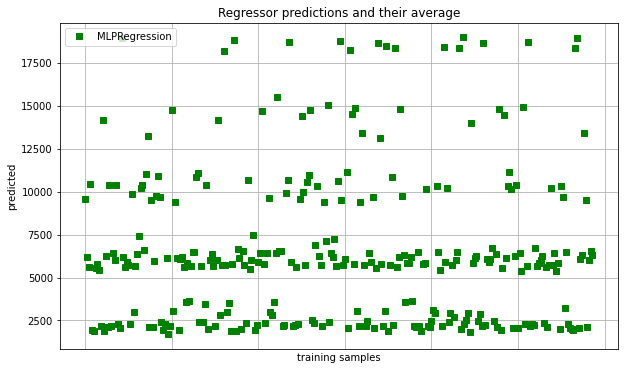

In [ ]:
plt.figure(figsize=(10,6))
# plt.plot(predictions2, 'yo', label='LinearRegression')
# plt.plot(y_pred_RF, 'b^', label='RandomForestRegressor')
plt.plot(y_pred_MLP, 'gs', label='MLPRegression')
# plt.plot(preds_XG, 'r*', ms=10, label='XGBRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
plt.grid(b=None)
plt.show()

# Comparing all performance of the models

In [ ]:
print('RMSE_XG:', mean_squared_error(y_test, preds_XG, squared=False ))
print('RMSE_LINEAR:', mean_squared_error(y_test, y_hat_REG, squared=False ))
print('RMSE_RF:', mean_squared_error(y_test, y_pred_RF, squared=False ))
print('RMSE_MLP:', mean_squared_error(y_test, y_pred_MLP, squared=False ))
print('***********************************************')
print('R2xg:', r2_score(y_test, preds_XG))
print('R2linear:', r2_score(y_test, y_hat_REG))
print('R2rf:', r2_score(y_test, y_pred_RF))
print('R2mlp:', r2_score(y_test, y_pred_MLP))
print('***********************************************')
print('explained_variance_scorexg:', explained_variance_score(y_test, preds_XG))
print('explained_variance_scorelinear:', explained_variance_score(y_test, y_hat_REG))
print('explained_variance_scorerf:', explained_variance_score(y_test, y_pred_RF))
print('explained_variance_scoremlp:', explained_variance_score(y_test, y_pred_MLP))
print('***********************************************')
print('MAExg:', mean_absolute_error(y_test, preds_XG))
print('MAEline:', mean_absolute_error(y_test, y_hat_REG))
print('MAErf:', mean_absolute_error(y_test, y_pred_RF))
print('MAEmlp:', mean_absolute_error(y_test, y_pred_MLP))

RMSE_XG: 1057.9634561593243
RMSE_LINEAR: 1300.7712775333073
RMSE_RF: 1060.4770260412415
RMSE_MLP: 1300.763668623166
***********************************************
R2xg: 0.9479135245458334
R2linear: 0.9212617941067333
R2rf: 0.9476657304989752
R2mlp: 0.9212627152681878
***********************************************
explained_variance_scorexg: 0.9481795925409254
explained_variance_scorelinear: 0.9213385448127992
explained_variance_scorerf: 0.9479438798507033
explained_variance_scoremlp: 0.9213395648672207
***********************************************
MAExg: 824.1323914819834
MAEline: 1002.8484219505741
MAErf: 823.1476959323938
MAEmlp: 1002.8408629297458


# **Improvement**

In [ ]:
lastpred = ((y_pred_RF+y_pred_MLP+preds_XG)/3)

print('New Pred')
print('RMSE:', mean_squared_error(y_test, lastpred, squared=False ))
print('R2:', r2_score(y_test, lastpred))
print('explained_variance_scoremlp:', explained_variance_score(y_test, lastpred))
print('MAE:', mean_absolute_error(y_test, lastpred))



New Pred
RMSE: 1066.5151085441057
R2: 0.9470680782414793
explained_variance_scoremlp: 0.9472618055866028
MAE: 816.9490843255403


# For enrichment - not mentioned in the report

# NN- 5 lyers

>



In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(26, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(26, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(26, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(26, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 26)                390       
_________________________________________________________________
dense_21 (Dense)             (None, 26)                702       
_________________________________________________________________
dense_22 (Dense)             (None, 26)                702       
_________________________________________________________________
dense_23 (Dense)             (None, 26)                702       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 27        
Total params: 2,523
Trainable params: 2,523
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

print(checkpoint)

In [ ]:
%time NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
import os
import datetime as dt
import six
import numpy as np
import h5py

In [ ]:

hdFileName = 'Weights-331--964.97888.hdf5'
modeType   = 'r'
hdfid = h5py.File(hdFileName, modeType)

In [ ]:
print(hdfid)

In [ ]:
wights_file = hdFileName

In [ ]:
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:

predictions = NN_model.predict(X_test)
# print(predictions)

In [ ]:
print(mean_squared_error(y_test, predictions))
print(mean_squared_error(y_test, predictions, squared=False))
print(r2_score(y_test, predictions))
print(explained_variance_score(y_test, predictions))
